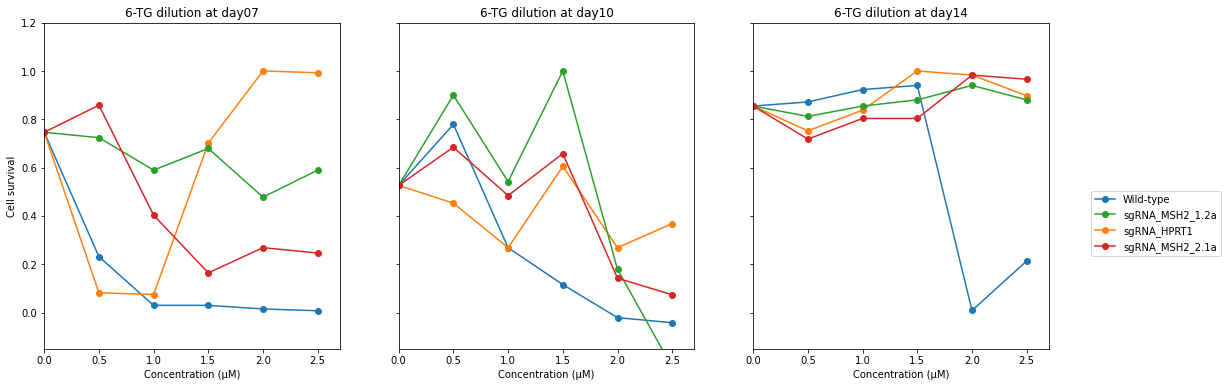

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("/Users/ds39/Documents/Saturation_genome_editing/Results/96wells/230309_DilutiongraphPython/lab2_6tg.csv")

# Convert day values to floats
data["day07"] = data["day07"].astype(float)
data["day10"] = data["day10"].astype(float)
data["day14"] = data["day14"].astype(float)

# Normalize data
data[["day07", "day10", "day14"]] = data[["day07", "day10", "day14"]].div(data[["day07", "day10", "day14"]].max(axis=0))

# Set axis limits and ticks
y_min = -0.15
y_max = 1
y_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]

x_min = 0
x_max = 2.7
x_ticks = [0, 0.5, 1, 1.5, 2, 2.5]

# Set axis labels
x_label = "Concentration (µM)"
y_label = "Cell survival"

# Set plot title
title = "6-TG dilution at"

# Create line plot for each group and day
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

days = ["day07", "day10", "day14"]

for i, day in enumerate(days):
    for group, group_data in data.groupby("group"):
        ax[i].plot(group_data["concentration_uM"], group_data[day], label=group, marker="o", linestyle="-")

    # Set axis limits and ticks
    ax[i].set_ylim([y_min, y_max])
    ax[i].set_yticks(y_ticks)
    ax[i].set_xlim([x_min, x_max])
    ax[i].set_xticks(x_ticks)

    # Set axis labels
    ax[i].set_xlabel(x_label)
    # Set y-label for first axis only
    if i == 0:
        ax[i].set_ylabel(y_label)

    # Set title
    ax[i].set_title(title + " " + day)

    # Add legend
    if i == 0:
        handles, labels = ax[i].get_legend_handles_labels()
        unique_labels = list(set(labels))
        handles = [handles[labels.index(label)] for label in unique_labels]
        ax[i].legend(handles, unique_labels, loc="best", bbox_to_anchor=(4, 0.5))

#plt.suptitle(title, fontsize=16)
plt.show()

In [20]:
# Save plot as PDF
fig.savefig("/Users/ds39/Documents/Saturation_genome_editing/Results/96wells/230309_DilutiongraphPython/lab2_6tg.pdf", dpi=300, bbox_inches="tight")

In [21]:
# Save plot as JPEG
fig.savefig("/Users/ds39/Documents/Saturation_genome_editing/Results/96wells/230309_DilutiongraphPython/lab2_6tg.jpg", dpi=300, bbox_inches="tight")